In [45]:
# Maybe a training data set of < 32/64 for each digit and then a collection of 4-8 "unknown" digits for each
# data cleaning and splitting the data into y_tr and X_tr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

train_file = open("train", "r")
test_file = open("test", "r")

train = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
test = []

counter = 0
training_data = []

for i in train_file:
    pixels = [float(x) for x in i.strip().split(" ")]
    train[int(pixels[0])].append(pixels[1:257])
    training_data.append([float(x) for x in i.strip().split(" ")])

training_data = np.array(training_data)

y_tr = training_data[:,0]
X_tr = training_data[:,1:257]
    

In [46]:
# splitting the data into y_ts and X_ts
counter = 0
test_data = []

for i in test_file:
    test_data.append([float(x) for x in i.strip().split(" ")])

test_data = np.array(test_data)

y_ts = test_data[:,0]
X_ts = test_data[:,1:257]

# converting X_ts into 16x16 matrix form
X_ts_matrix = []
for i in range(0, len(X_ts)):
    matrix_i = np.reshape(X_ts[i], (16, 16))
    X_ts_matrix.append(matrix_i)

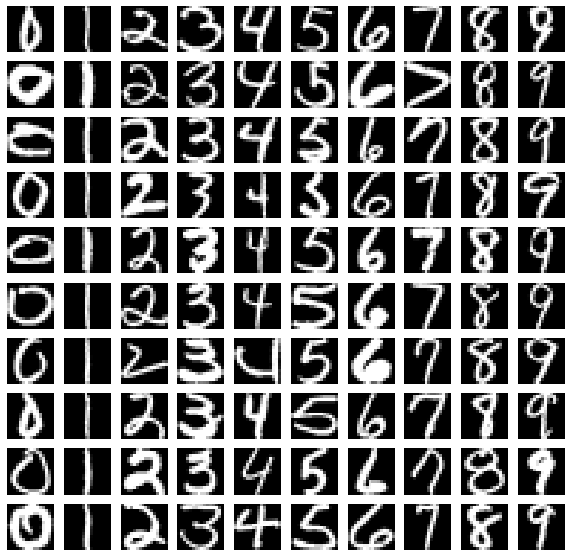

In [32]:
# Data visualization for training data
num_samples = 10
num_classes = len(set(y_tr))

classes = set(y_tr)
num_classes = len(classes)
fig, ax = plt.subplots(num_samples, num_classes, sharex = True, sharey = True, figsize=(num_classes, num_samples))

for label in range(num_classes):
    class_idxs = np.where(y_tr == label)
    for i, idx in enumerate(np.random.randint(0, class_idxs[0].shape[0], num_samples)):
        ax[i, label].imshow(X_tr[class_idxs[0][idx]].reshape([16, 16]), 'gray')
        ax[i, label].set_axis_off()

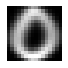

In [33]:
# find the average vector  (centroid)  for each digit
def centroid(numbers):
    matrix = []
    for i in range(0,256):
        i_coords = [x[i] for x in numbers]
        _len = len(numbers)
        centroid_i = sum(i_coords)/_len
        matrix.append(centroid_i)
    return matrix

# test for zero centroid
zeros = np.array(train[0])
centroid_zero = centroid(zeros)

# this is just double checking the centroid function works
y_tr = np.array([0])
X_tr = np.array([centroid_zero])

num_samples = 1
num_classes = len(set(y_tr))

classes = set(y_tr)
num_classes = len(classes)
fig, ax = plt.subplots(num_samples, num_classes, sharex = True, sharey = True, figsize=(num_classes, num_samples),squeeze=False)


for label in range(num_classes):
    class_idxs = np.where(y_tr == label)
    for i, idx in enumerate(np.random.randint(0, class_idxs[0].shape[0], num_samples)):
        ax[i, label].imshow(X_tr[class_idxs[0][idx]].reshape([16, 16]), 'gray')
        ax[i, label].set_axis_off()

In [53]:
# find the average centroid for all digits and put in list
def get_all_centroids():
    centroid_list = []
    for i in range(0,9):
        number_i = np.array(train[i])
        centroid_i = centroid(zeros)
        centroid_list.append(centroid_i)
    return centroid_list
centroid_list = get_all_centroids()

In [48]:
#convert centroid_list into 16x16 matrix
centroid_matrix = []
for i in range(0, len(centroid_list)):
    matrix_i = np.reshape(centroid_list[i], (16, 16))
    centroid_matrix.append(matrix_i)

In [39]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [57]:
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        #assigned_centroid.append(np.argmin(distance))
        assigned_centroid.append(distance.index(min(distance)))
    return assigned_centroid

In [58]:
get_centroids = findClosestCentroids(centroid_list, X_ts)
get_centroids

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
